# Análise de Coocorrência em Prontuários Médicos

Este notebook realiza uma análise de coocorrência para identificar:
- Doenças que frequentemente aparecem juntas em um mesmo prontuário;
- Correlação entre medicamentos e doenças.

## 1. Importação de Bibliotecas e Dados

As bibliotecas usadas incluem:
- **pandas**: Manipulação e análise de dados;
- **seaborn** e **matplotlib**: Visualização de dados;
- **networkx**: Análise e visualização de grafos de coocorrência (opcional).

In [1]:
# Importação de bibliotecas necessárias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Configurações de gráficos
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# Carregar os dados do CSV
df = pd.read_csv("ner_results_unique.csv")
df.head()

,File,Entity,Label
0,prontuario_Abram_Schinner.pdf,overdose,DISEASE
1,prontuario_Abram_Schinner.pdf,bronchitis,DISEASE
2,prontuario_Abram_Schinner.pdf,acetaminophen,CHEMICAL
3,prontuario_Abram_Schinner.pdf,dextromethorphan hydrobromide,CHEMICAL
4,prontuario_Abram_Schinner.pdf,doxylamine succinate,CHEMICAL


## 2. Preparação dos Dados

Nesta etapa, organizamos os dados para:
- Criar uma matriz de coocorrência para doenças;
- Mapear as correlações entre medicamentos e doenças.

In [2]:
# Separar doenças e medicamentos
diseases = df[df["Label"] == "DISEASE"]
chemicals = df[df["Label"] == "CHEMICAL"]

# Criar um dicionário com doenças por prontuário
disease_dict = diseases.groupby("File")["Entity"].apply(list)

# Criar pares de medicamentos e doenças
chemical_disease_pairs = pd.merge(chemicals, diseases, on="File", suffixes=("_chemical", "_disease"))
chemical_disease_pairs = chemical_disease_pairs[["Entity_chemical", "Entity_disease", "File"]]
chemical_disease_pairs.head()

,Entity_chemical,Entity_disease,File
0,acetaminophen,overdose,prontuario_Abram_Schinner.pdf
1,acetaminophen,bronchitis,prontuario_Abram_Schinner.pdf
2,dextromethorphan hydrobromide,overdose,prontuario_Abram_Schinner.pdf
3,dextromethorphan hydrobromide,bronchitis,prontuario_Abram_Schinner.pdf
4,doxylamine succinate,overdose,prontuario_Abram_Schinner.pdf


## 3. Análise de Coocorrência de Doenças

Aqui criamos uma matriz de coocorrência que indica a frequência com que doenças aparecem juntas nos prontuários.

- from itertools import combinations
- from collections import Counter

In [3]:
from itertools import combinations
from collections import Counter

# Gerar pares de coocorrência para cada prontuário
disease_pairs = []
for disease_list in disease_dict:
    disease_pairs.extend(combinations(sorted(disease_list), 2))

# Contar coocorrências
cooccurrence_counts = Counter(disease_pairs)
cooccurrence_df = pd.DataFrame(cooccurrence_counts.items(), columns=["Pair", "Count"])
cooccurrence_df["Disease1"] = cooccurrence_df["Pair"].apply(lambda x: x[0])
cooccurrence_df["Disease2"] = cooccurrence_df["Pair"].apply(lambda x: x[1])
cooccurrence_df = cooccurrence_df.drop(columns=["Pair"])

# Pivotar para matriz de coocorrência
cooccurrence_matrix = cooccurrence_df.pivot(index="Disease1", columns="Disease2", values="Count").fillna(0)

# Salvar a matriz em um arquivo CSV
cooccurrence_matrix.to_csv("matriz_coocorrencia.csv")
print("Matriz de coocorrência salva em 'matriz_coocorrencia.csv'.")

# Exibir matriz de coocorrência
cooccurrence_matrix.head()

Matriz de coocorrência salva em 'matriz_coocorrencia.csv'.


Disease2,allergic disorder,allergic rhinitis,allergy,alzheimers disease,anemia,antepartum eclampsia,appendicitis,asthma,atopic dermatitis,atrial fibrillation,...,tuberculosis,type ii diabetes mellitus,urinary\ntract infection,urinary tract infection,varicella,"varicella-zoster virus antibody, skin test",viral sinusitis,whiplash injury,zoila,zoster
Disease1,,,,,,,,,,,,,,,,,,,,,
abortion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
acute allergic reaction,4.0,8.0,2.0,0.0,2.0,0.0,0.0,2.0,5.0,0.0,...,1.0,0.0,0.0,0.0,12.0,1.0,9.0,0.0,0.0,0.0
allergic\ndisorder,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
allergic disorder,0.0,17.0,16.0,1.0,1.0,0.0,0.0,6.0,7.0,0.0,...,6.0,0.0,0.0,0.0,3.0,2.0,18.0,0.0,0.0,0.0
allergic rhinitis,0.0,0.0,20.0,0.0,7.0,1.0,1.0,17.0,14.0,0.0,...,11.0,0.0,0.0,3.0,26.0,0.0,47.0,3.0,0.0,8.0


### Visualização da Matriz de Coocorrência

Usamos um heatmap para visualizar as frequências de coocorrência.

In [4]:
# Carregar a matriz de coocorrência
cooccurrence_matrix = pd.read_csv('C:\\Users\\Usuario\\Desktop\\TCCPLN\\matriz_coocorrencia.csv', index_col=0)

# Obter as 10 doenças mais frequentes
disease_counts = cooccurrence_matrix.sum(axis=1).sort_values(ascending=False)
top_10_diseases = disease_counts.head(10).index

# Filtrar a matriz de coocorrência para as 10 doenças mais frequentes
filtered_matrix = cooccurrence_matrix.loc[top_10_diseases, top_10_diseases]

# Criar o heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_matrix,
    cmap='Reds',       # Escolha de cor
    cbar=True,          # Exibir barra de cores
    square=True         # Tornar as células quadradas
)

# Configurações do gráfico
plt.title('Heatmap de Coocorrência das 10 Doenças Mais Frequentes', fontsize=16)
plt.xlabel('Doenças', fontsize=12)
plt.ylabel('Doenças', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\Usuario\\Desktop\\TCCPLN\\matriz_coocorrencia.csv'

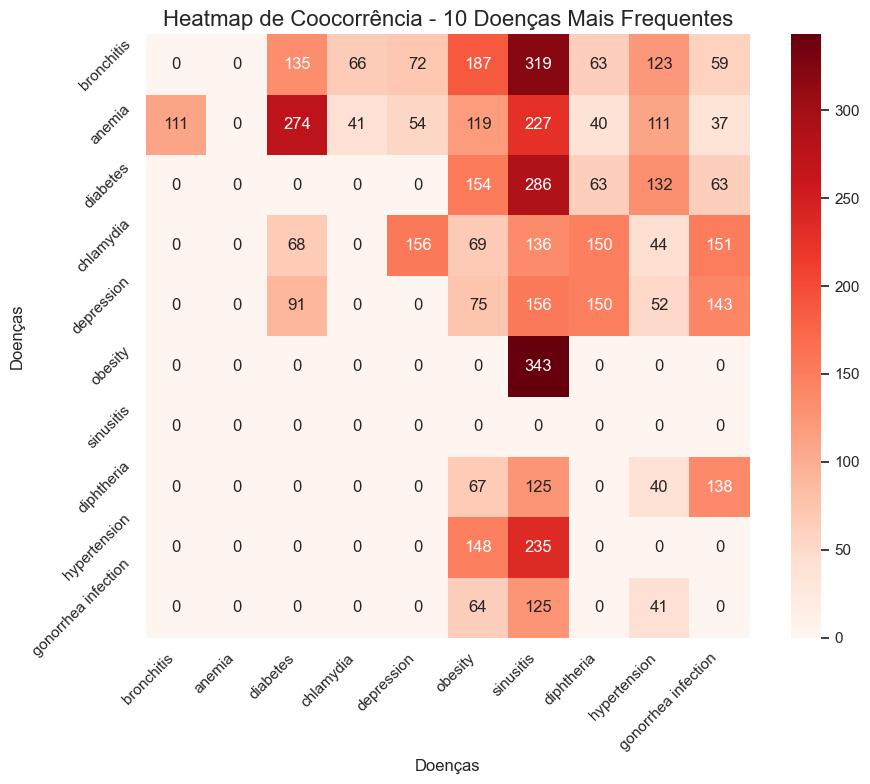

In [6]:

# Configurações de estilo
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 8)

# Carregar os dados do CSV da matriz de coocorrência
cooccurrence_matrix = pd.read_csv('C:\\Users\\Usuario\\Desktop\\TCCPLN\\matriz_coocorrencia.csv', index_col=0)

# Calcular a soma das coocorrências para identificar as doenças mais frequentes
disease_counts = cooccurrence_matrix.sum(axis=1).sort_values(ascending=False)

# Selecionar as 10 doenças mais frequentes
top_10_diseases = disease_counts.head(10).index

# Filtrar a matriz para as 10 doenças mais frequentes
filtered_matrix = cooccurrence_matrix.loc[top_10_diseases, top_10_diseases]

# Criar o heatmap com os valores dentro dos quadrados
plt.figure(figsize=(10, 8))
sns.heatmap(
    filtered_matrix,
    annot=True,         # Mostrar os valores nas células
    fmt='.0f',          # Formato dos valores (inteiros)
    cmap='Reds',        # Paleta de cores
    cbar=True,          # Exibir a barra de cores
    square=True         # Manter as células quadradas
)

# Configurações do gráfico
plt.title('Heatmap de Coocorrência - 10 Doenças Mais Frequentes', fontsize=16)
plt.xlabel('Doenças', fontsize=12)
plt.ylabel('Doenças', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45)
plt.tight_layout()

# Mostrar o gráfico
plt.show()


## 4. Correlação entre Medicamentos e Doenças

Identificar medicamentos que frequentemente aparecem junto com determinadas doenças.

In [7]:
# Contar frequência de correlações medicamento-doença
medication_disease_counts = chemical_disease_pairs.groupby(["Entity_chemical", "Entity_disease"]).size()
medication_disease_counts = medication_disease_counts.reset_index(name="Count")

# Exibir principais correlações
medication_disease_counts.sort_values(by="Count", ascending=False).head(10)

,Entity_chemical,Entity_disease,Count
179,acetaminophen,sinusitis,442
75,acetaminophen,bronchitis,424
192,acetaminophen,viral sinusitis,382
164,acetaminophen,pharyngitis,281
801,amoxicillin,sinusitis,248
156,acetaminophen,obesity,246
813,amoxicillin,viral sinusitis,235
1624,clavulanate,sinusitis,213
1635,clavulanate,viral sinusitis,207
101,acetaminophen,diabetes,198


### Visualização das Correlações

Criamos gráficos para destacar as correlações mais frequentes entre medicamentos e doenças.

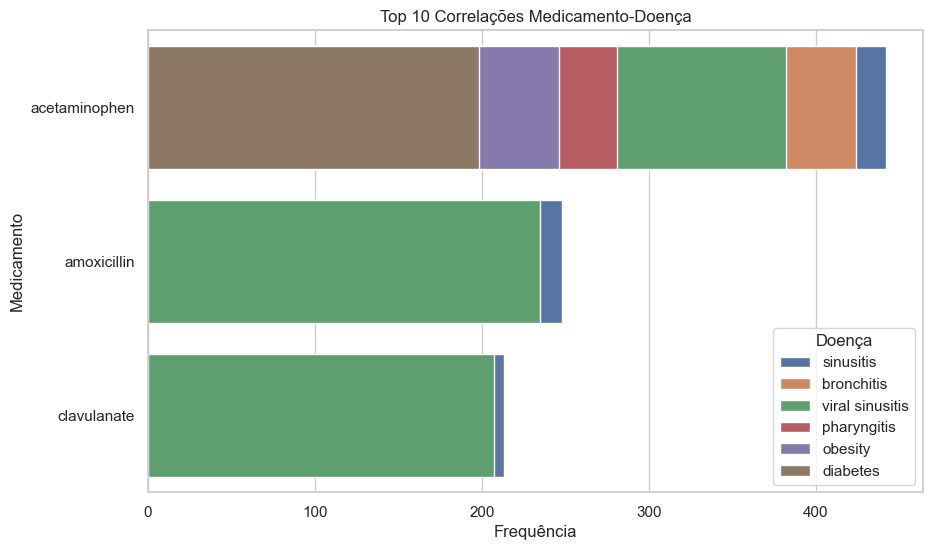

In [8]:
# Gráfico de barras para as correlações mais frequentes
top_pairs = medication_disease_counts.sort_values(by="Count", ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x="Count", y="Entity_chemical", hue="Entity_disease", data=top_pairs, dodge=False)
plt.title("Top 10 Correlações Medicamento-Doença")
plt.xlabel("Frequência")
plt.ylabel("Medicamento")
plt.legend(title="Doença")
plt.show()

## 5. Conclusão

Com esta análise, conseguimos:
- Identificar padrões de doenças que frequentemente aparecem juntas;
- Explorar as relações entre medicamentos e doenças em prontuários médicos.

Essas informações podem ser úteis para aplicações clínicas e predições futuras.

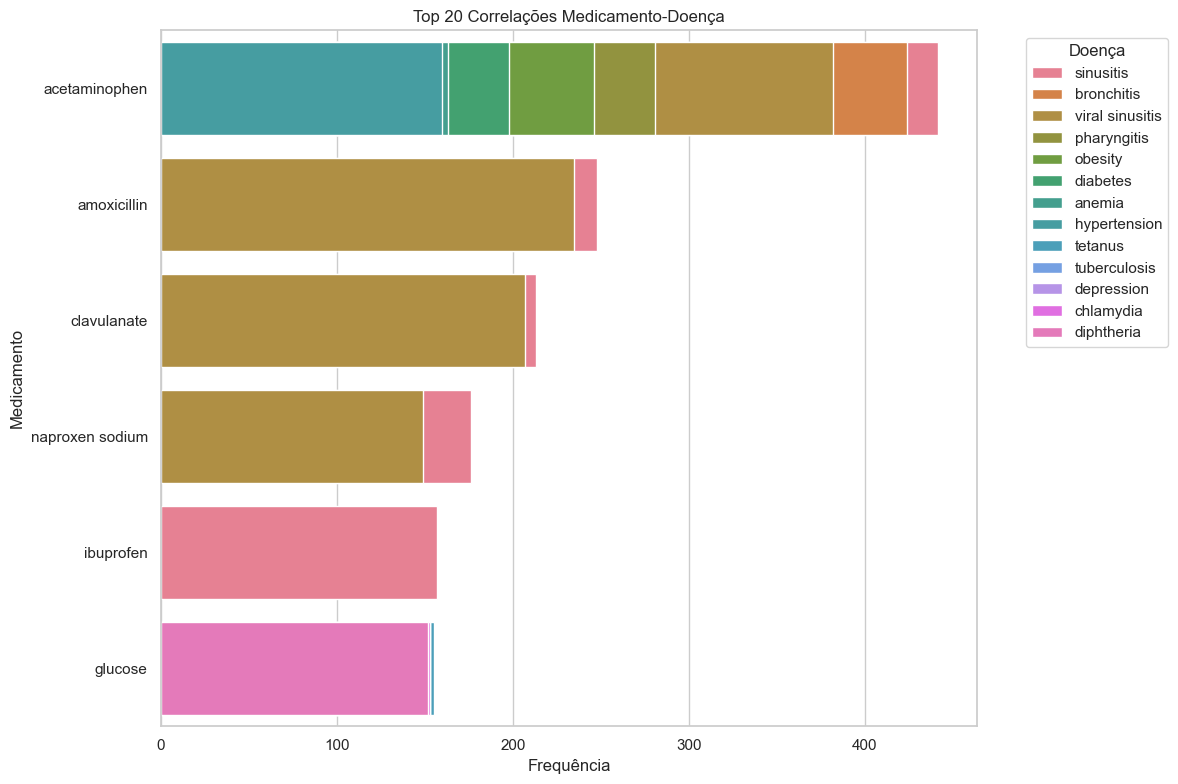

In [9]:
# Exibir os 20 pares mais frequentes
top_pairs = medication_disease_counts.sort_values(by="Count", ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x="Count", y="Entity_chemical", hue="Entity_disease", data=top_pairs, dodge=False)
plt.title("Top 20 Correlações Medicamento-Doença")
plt.xlabel("Frequência")
plt.ylabel("Medicamento")
plt.legend(title="Doença", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


C:\Users\Usuario\AppData\Local\Temp\ipykernel_14592\1107762017.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


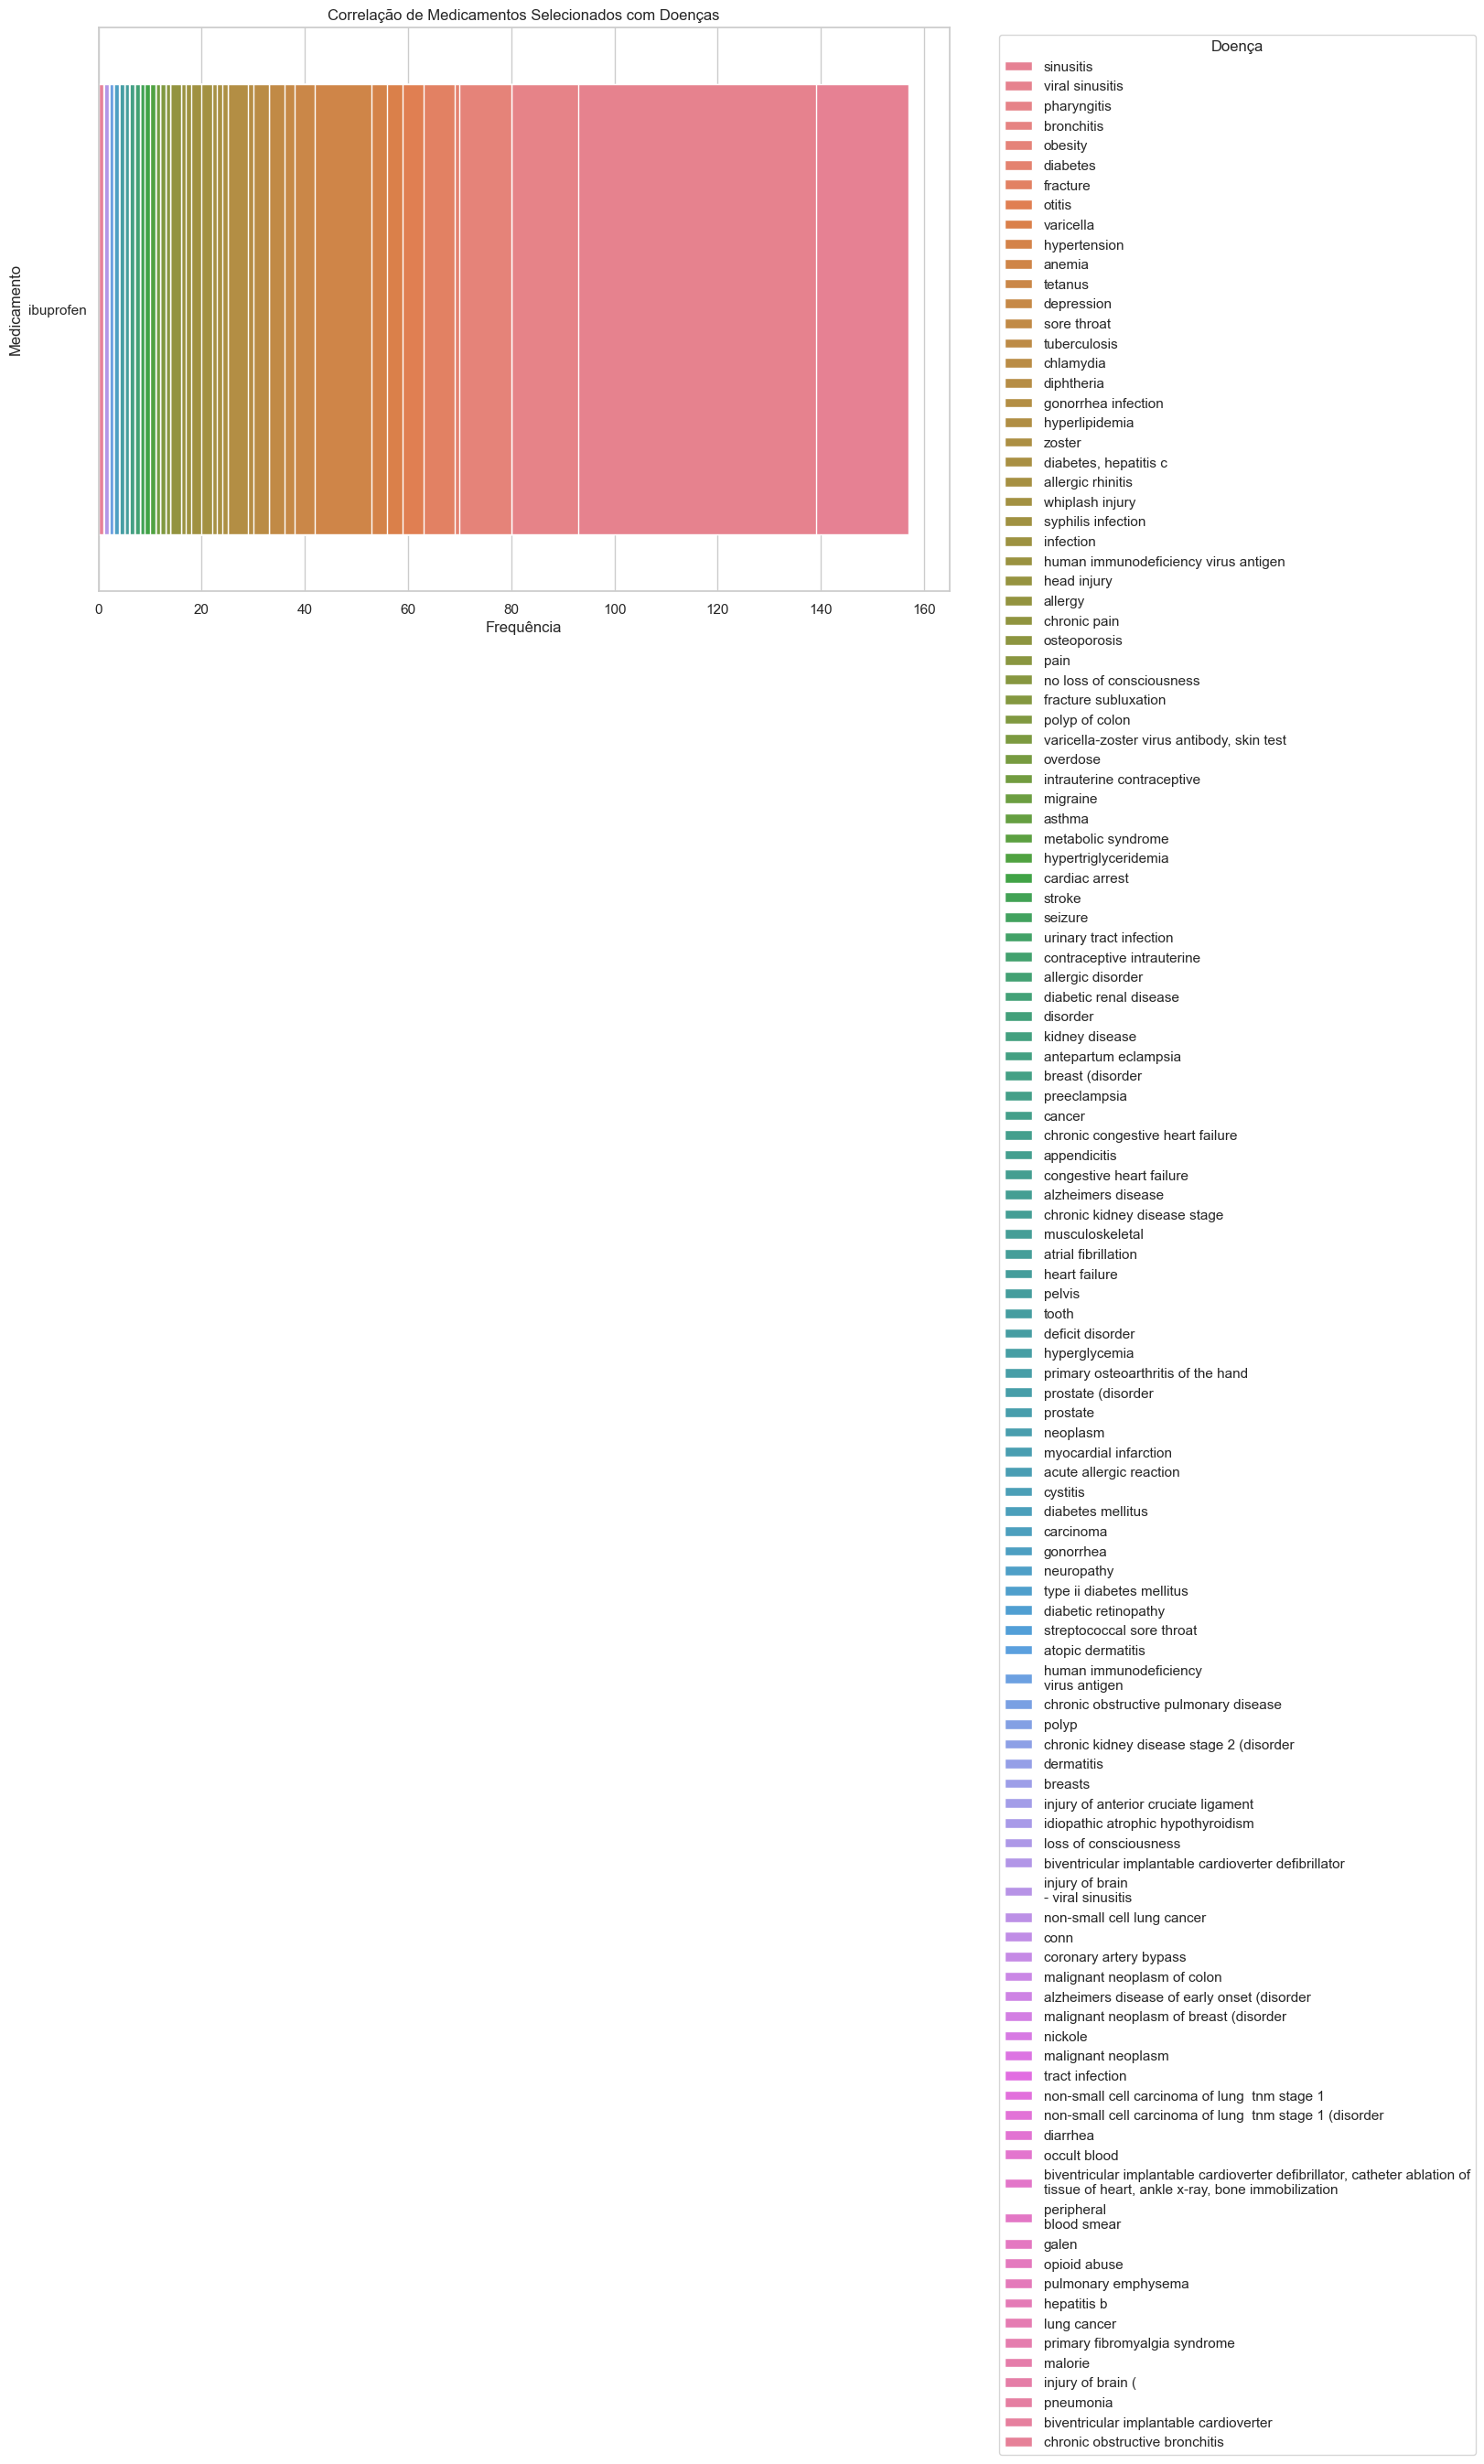

In [15]:
# Lista de medicamentos específicos
selected_meds = ["ibuprofen"]

# Filtrar os dados para os medicamentos selecionados
selected_pairs = medication_disease_counts[medication_disease_counts["Entity_chemical"].isin(selected_meds)]

# Ordenar pelos pares mais frequentes
selected_pairs = selected_pairs.sort_values(by="Count", ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x="Count", y="Entity_chemical", hue="Entity_disease", data=selected_pairs, dodge=False)
plt.title("Correlação de Medicamentos Selecionados com Doenças")
plt.xlabel("Frequência")
plt.ylabel("Medicamento")
plt.legend(title="Doença", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
